In [41]:
import pandas as pd

# Data Ingestion

In [ ]:
df = pd.read_csv('data/gemstone.csv')

In [43]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [44]:
df_copy = df.copy()

In [45]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [48]:
df.drop(labels = ['id'], axis=1, inplace = True)

In [49]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [50]:
df.dtypes


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [51]:
df.dtypes[df.dtypes == 'object']

cut        object
color      object
clarity    object
dtype: object

In [52]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index

In [53]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [54]:
numerical_columns = df.dtypes[df.dtypes != 'object'].index

In [55]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [56]:
df[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [57]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [58]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [59]:
df.size

1935730

In [60]:
df = df.sample(frac=0.30)


In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
118739,0.30,Ideal,E,SI1,61.1,56.0,4.31,4.36,2.65,524
64243,0.55,Ideal,E,VS1,61.2,56.0,5.30,5.27,3.24,2093
40669,0.41,Ideal,F,VS2,62.0,56.0,4.80,4.74,2.96,1107
26972,0.51,Premium,G,VVS2,62.6,58.0,5.14,5.08,3.20,1600
19509,1.52,Very Good,J,SI2,59.5,61.0,7.46,7.53,4.45,8287


In [62]:
df.size

580720

In [63]:
df['clarity'].value_counts()

clarity
SI1     16065
VS2     14501
SI2      9140
VS1      9118
VVS2     4766
VVS1     3112
IF       1225
I1        145
Name: count, dtype: int64

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

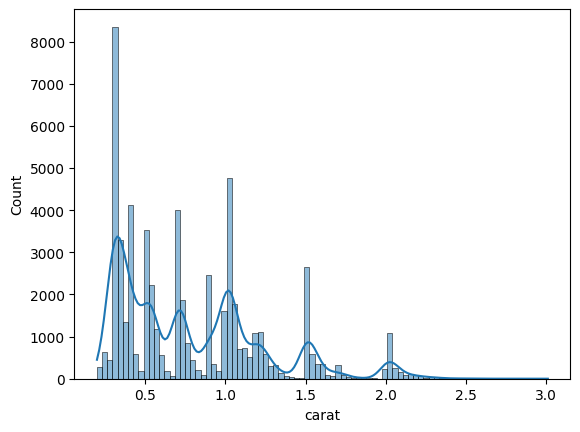

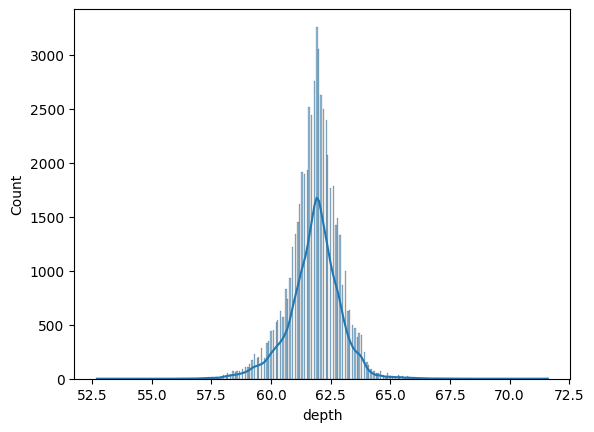

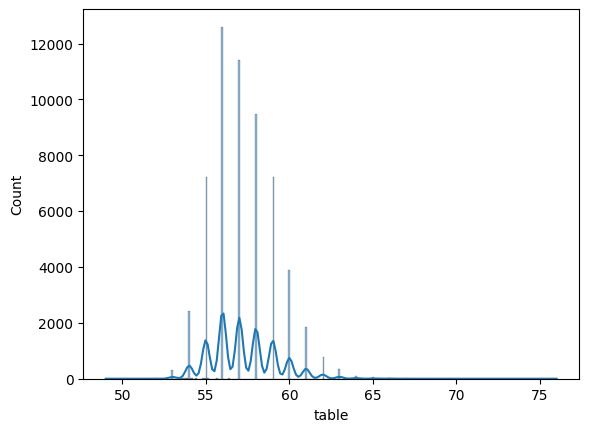

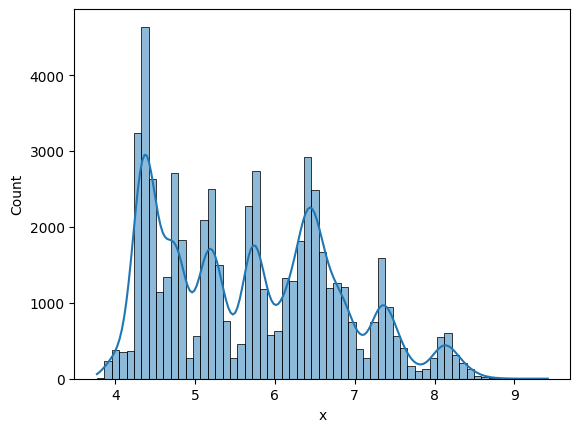

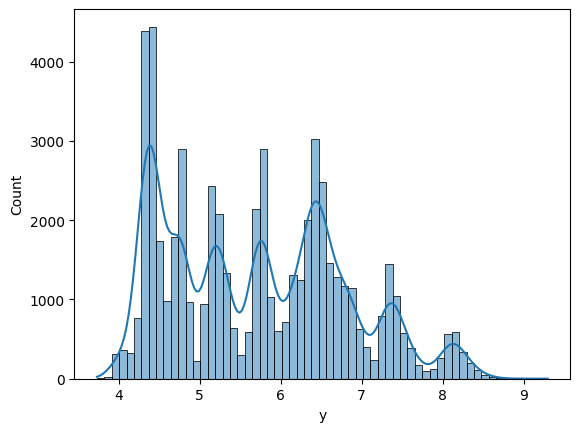

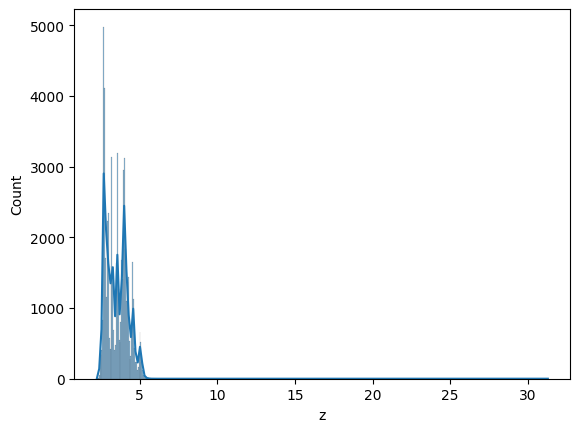

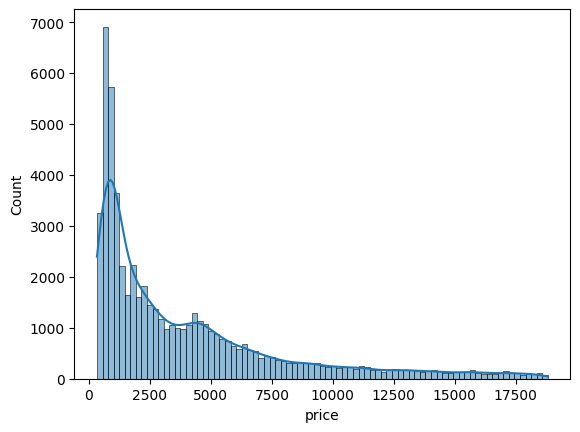

In [66]:
plt.Figure(figsize=(6,6))
x = 0 
for i in numerical_columns:
    sns.histplot(data = df,x= i, kde=True )
    print('\n')
    plt.show()

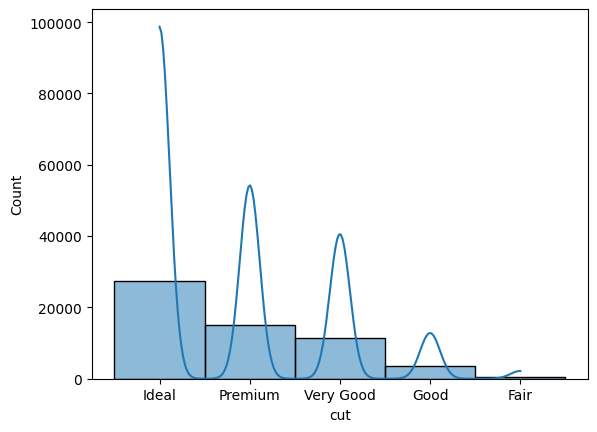

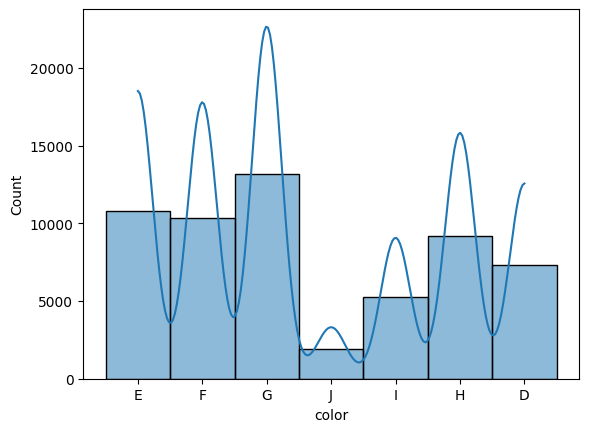

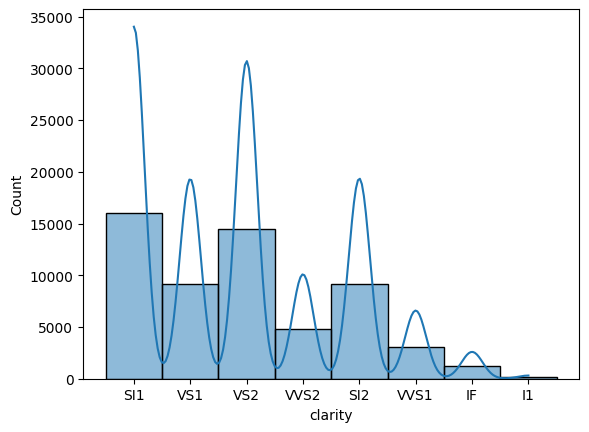

In [67]:
plt.Figure(figsize=(6,6))
x=0
for i in categorical_columns:
    sns.histplot(data =df , x= i , kde=True)
    print('\n')
    plt.show()

In [68]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [69]:
df['cut']=df['cut'].map({'Ideal':1 , 'Very Good':3 , 'Premium':2 , 'Fair':4 , 'Good':5  })

In [70]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
118739,0.30,1,E,SI1,61.1,56.0,4.31,4.36,2.65,524
64243,0.55,1,E,VS1,61.2,56.0,5.30,5.27,3.24,2093
40669,0.41,1,F,VS2,62.0,56.0,4.80,4.74,2.96,1107
26972,0.51,2,G,VVS2,62.6,58.0,5.14,5.08,3.20,1600
19509,1.52,3,J,SI2,59.5,61.0,7.46,7.53,4.45,8287


In [71]:
df['color'] = df['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7 })

In [72]:
df['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [73]:
df['clarity'] = df['clarity'].map({'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8 })

In [74]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
118739,0.30,1,2,6,61.1,56.0,4.31,4.36,2.65,524
64243,0.55,1,2,4,61.2,56.0,5.30,5.27,3.24,2093
40669,0.41,1,3,5,62.0,56.0,4.80,4.74,2.96,1107
26972,0.51,2,4,3,62.6,58.0,5.14,5.08,3.20,1600
19509,1.52,3,7,7,59.5,61.0,7.46,7.53,4.45,8287


In [75]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.138463,0.292557,0.346818,0.024033,0.228083,0.981019,0.980528,0.966070,0.943659
cut,0.138463,1.000000,0.015324,0.183663,0.250329,0.450551,0.134288,0.135477,0.155138,0.080782
color,0.292557,0.015324,1.000000,-0.089212,0.036452,0.033154,0.270004,0.270034,0.268705,0.211157
clarity,0.346818,0.183663,-0.089212,1.000000,0.060931,0.190316,0.374106,0.372247,0.371901,0.183441
depth,0.024033,0.250329,0.036452,0.060931,1.000000,-0.231737,-0.014512,-0.015458,0.077024,-0.001559
table,0.228083,0.450551,0.033154,0.190316,-0.231737,1.000000,0.240355,0.235970,0.213580,0.175843
x,0.981019,0.134288,0.270004,0.374106,-0.014512,0.240355,1.000000,0.999209,0.980863,0.901189
y,0.980528,0.135477,0.270034,0.372247,-0.015458,0.235970,0.999209,1.000000,0.980707,0.901201
z,0.966070,0.155138,0.268705,0.371901,0.077024,0.213580,0.980863,0.980707,1.000000,0.885287
price,0.943659,0.080782,0.211157,0.183441,-0.001559,0.175843,0.901189,0.901201,0.885287,1.000000


<Axes: >

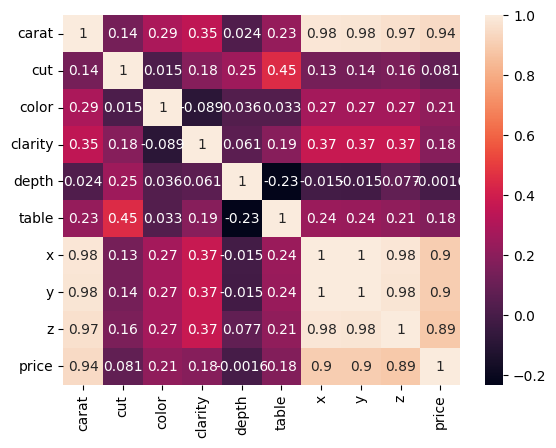

In [76]:
sns.heatmap(df.corr(), annot= True)